In [3]:
!pwd
#%cd /content/EVA5

/content


In [4]:
!git clone https://github.com/vigneshbabupj/EVA5.git
#!git pull

Cloning into 'EVA5'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 58 (delta 26), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (58/58), done.


In [5]:
%cd /content/EVA5/S7

/content/EVA5/S7


In [7]:
!ls

EVA_A7_Main.ipynb   eva_model.py	   eva_test.py	 eva_utils.py
eva_data_loader.py  eva_regularization.py  eva_train.py  readme.md


In [8]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.optim as optim

In [18]:
# from google.colab import drive
# drive.mount("mnt")
# %cd "mnt/My Drive/Colab Notebooks"

In [9]:
#import Different modules
from eva_model import Assign_7_Cifar10_model
from eva_data_loader import CIFAR10_dataloader
from eva_train import train
from eva_test import test
from  eva_utils import incorrect_images
import eva_regularization as rg

In [10]:
# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

seed=121

torch.manual_seed(seed)

print("Using Cuda : ", use_cuda)


Using Cuda :  True


In [11]:
Batch_Size = 128

train_loader,test_loader, classes = CIFAR10_dataloader(Batch_Size, use_cuda)

Extracting /data/cifar-10-python.tar.gz to /data/
Files already downloaded and verified


In [12]:
from torchsummary import summary

model = Assign_7_Cifar10_model().to(device)

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 64, 32, 32]          18,432
              ReLU-5           [-1, 64, 32, 32]               0
       BatchNorm2d-6           [-1, 64, 32, 32]             128
         MaxPool2d-7           [-1, 64, 16, 16]               0
            Conv2d-8           [-1, 32, 18, 18]           2,048
              ReLU-9           [-1, 32, 18, 18]               0
      BatchNorm2d-10           [-1, 32, 18, 18]              64
           Conv2d-11           [-1, 32, 18, 18]             288
             ReLU-12           [-1, 32, 18, 18]               0
      BatchNorm2d-13           [-1, 32, 18, 18]              64
           Conv2d-14           [-1, 64,

In [13]:
model = Assign_7_Cifar10_model().to(device)

lambda_l1 = 0
lambda_l2 = 0

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=lambda_l2)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.01)

train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_acc, train_loss = train(model, device, train_loader, optimizer, lambda_l1,criterion)
    train_losses.append(train_loss)
    train_accuracy.append(train_acc)

    #scheduler.step()
    test_acc, test_loss = test(model, device, test_loader, criterion)
    test_losses.append(test_loss)
    test_accuracy.append(test_acc)

#model_file = 'models/'+versions+'.pth'
#torch.save(model.state_dict(), model_file)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Train: Batch id: 390 	Loss: 0.917990	 Accuracy:52.612: 100%|██████████| 391/391 [00:40<00:00,  9.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008466, Accuracy: 6189/10000 (61.890%)

EPOCH: 1


Train: Batch id: 390 	Loss: 0.836911	 Accuracy:68.954: 100%|██████████| 391/391 [00:38<00:00, 10.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.006375, Accuracy: 7141/10000 (71.410%)

EPOCH: 2


Train: Batch id: 390 	Loss: 0.680100	 Accuracy:75.394: 100%|██████████| 391/391 [00:39<00:00, 10.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005662, Accuracy: 7508/10000 (75.080%)

EPOCH: 3


Train: Batch id: 390 	Loss: 0.552265	 Accuracy:79.236: 100%|██████████| 391/391 [00:39<00:00,  9.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005104, Accuracy: 7800/10000 (78.000%)

EPOCH: 4


Train: Batch id: 390 	Loss: 0.518418	 Accuracy:81.804: 100%|██████████| 391/391 [00:38<00:00, 10.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004790, Accuracy: 7876/10000 (78.760%)

EPOCH: 5


Train: Batch id: 390 	Loss: 0.715362	 Accuracy:84.098: 100%|██████████| 391/391 [00:38<00:00, 10.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004749, Accuracy: 7918/10000 (79.180%)

EPOCH: 6


Train: Batch id: 390 	Loss: 0.433310	 Accuracy:85.514: 100%|██████████| 391/391 [00:39<00:00, 10.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004574, Accuracy: 8112/10000 (81.120%)

EPOCH: 7


Train: Batch id: 390 	Loss: 0.406136	 Accuracy:86.882: 100%|██████████| 391/391 [00:39<00:00, 10.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004476, Accuracy: 8103/10000 (81.030%)

EPOCH: 8


Train: Batch id: 390 	Loss: 0.536600	 Accuracy:88.038: 100%|██████████| 391/391 [00:38<00:00, 10.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004211, Accuracy: 8224/10000 (82.240%)

EPOCH: 9


Train: Batch id: 390 	Loss: 0.239427	 Accuracy:89.288: 100%|██████████| 391/391 [00:38<00:00, 10.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004071, Accuracy: 8305/10000 (83.050%)

EPOCH: 10


Train: Batch id: 390 	Loss: 0.471696	 Accuracy:90.048: 100%|██████████| 391/391 [00:39<00:00, 10.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004259, Accuracy: 8287/10000 (82.870%)

EPOCH: 11


Train: Batch id: 390 	Loss: 0.262116	 Accuracy:90.912: 100%|██████████| 391/391 [00:38<00:00, 10.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004564, Accuracy: 8194/10000 (81.940%)

EPOCH: 12


Train: Batch id: 390 	Loss: 0.265082	 Accuracy:91.536: 100%|██████████| 391/391 [00:38<00:00, 10.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004236, Accuracy: 8322/10000 (83.220%)

EPOCH: 13


Train: Batch id: 390 	Loss: 0.226510	 Accuracy:92.468: 100%|██████████| 391/391 [00:38<00:00, 10.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004391, Accuracy: 8269/10000 (82.690%)

EPOCH: 14


Train: Batch id: 390 	Loss: 0.342613	 Accuracy:92.950: 100%|██████████| 391/391 [00:38<00:00, 10.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004339, Accuracy: 8321/10000 (83.210%)

EPOCH: 15


Train: Batch id: 390 	Loss: 0.217672	 Accuracy:93.652: 100%|██████████| 391/391 [00:38<00:00, 10.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004382, Accuracy: 8369/10000 (83.690%)

EPOCH: 16


Train: Batch id: 390 	Loss: 0.289751	 Accuracy:94.302: 100%|██████████| 391/391 [00:38<00:00, 10.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004335, Accuracy: 8377/10000 (83.770%)

EPOCH: 17


Train: Batch id: 390 	Loss: 0.139136	 Accuracy:94.680: 100%|██████████| 391/391 [00:38<00:00, 10.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004642, Accuracy: 8336/10000 (83.360%)

EPOCH: 18


Train: Batch id: 390 	Loss: 0.142202	 Accuracy:94.958: 100%|██████████| 391/391 [00:39<00:00, 10.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004615, Accuracy: 8357/10000 (83.570%)

EPOCH: 19


Train: Batch id: 390 	Loss: 0.124597	 Accuracy:95.588: 100%|██████████| 391/391 [00:39<00:00, 10.01it/s]



Test set: loss: 0.004590, Accuracy: 8344/10000 (83.440%)



/content/EVA5/S7/eva_utils.py:55: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idxs_mask = (pred.eq(target.data.view_as(pred))==False).nonzero() ## store incorrect images
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


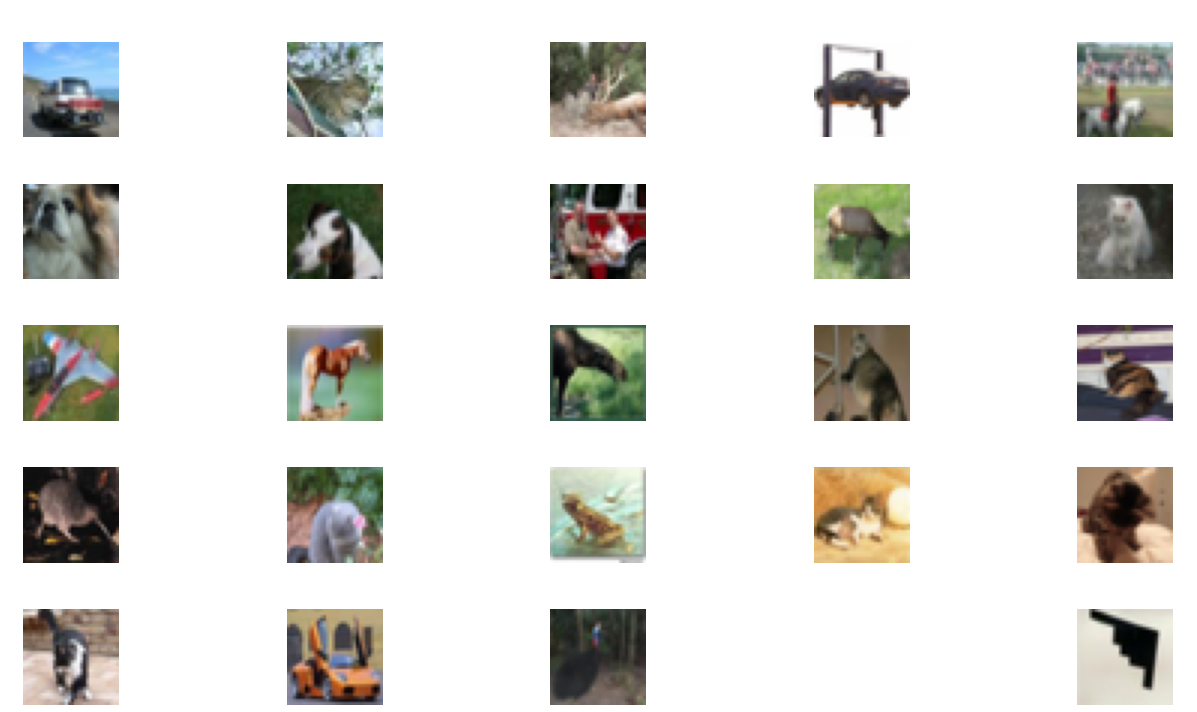

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

incorrect = incorrect_images(model, device, test_loader)
incorrect_examples = incorrect['images']
incorrect_pred = incorrect['Pred']
incorrect_target = incorrect['target']

inv_normalize = transforms.Normalize(
  mean=[-0.4890062/0.264582, -0.47970363/0.258996, -0.47680542/0.25643882],
  std=[1/0.264582, 1/0.258996, 1/0.25643882]
)


fig = plt.figure(figsize=(20,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  #plt.tight_layout(pad=0, w_pad=0, h_pad=0.4)
  #incorrect_examples_inv = inv_normalize(incorrect_examples[i])
  

  incorrect_examples_temp = inv_normalize(incorrect_examples[i])
  incorrect_examples_temp = incorrect_examples_temp.cpu().numpy()

  plt.imshow(np.transpose(incorrect_examples_temp, (1, 2, 0)).squeeze())
  plt.title(f"Predicted:{classes[incorrect_pred[i]]} \n Target:{classes[incorrect_target[i]]}",color='white',fontsize=16)
  plt.axis('off')
  plt.tight_layout() 
  

#plt.savefig('/content/drive/My Drive/models/incorrect_images.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device) 
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 96 %
Accuracy of   car : 93 %
Accuracy of  bird : 73 %
Accuracy of   cat : 56 %
Accuracy of  deer : 88 %
Accuracy of   dog : 62 %
Accuracy of  frog : 90 %
Accuracy of horse : 96 %
Accuracy of  ship : 92 %
Accuracy of truck : 96 %
